In [2]:
import pandas as pd

penguins = pd.read_csv("scikit-learn-mooc/datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

In [3]:
fname = "Flipper Length (mm)"
tname = "Body Mass (g)"

data = penguins[[fname]]
target = penguins[tname]

penguins[[fname, tname]].head(5)

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


In [4]:
def linear_model_flipper_mass(flipper_length, weight_flipper_length, intercept_body_mass):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass


In [5]:
import numpy as np
x_min = data[fname].min()
x_max = data[fname].max()

frange = np.linspace(x_min, x_max, num=300)
frange[:5], frange[-5:]

(array([172.        , 172.19732441, 172.39464883, 172.59197324,
        172.78929766]),
 array([230.21070234, 230.40802676, 230.60535117, 230.80267559,
        231.        ]))

In [6]:
weights = [2, 1, 22, 2]
intercepts = [1, 213, 1, 1]
len(weights), len(intercepts)

(4, 4)

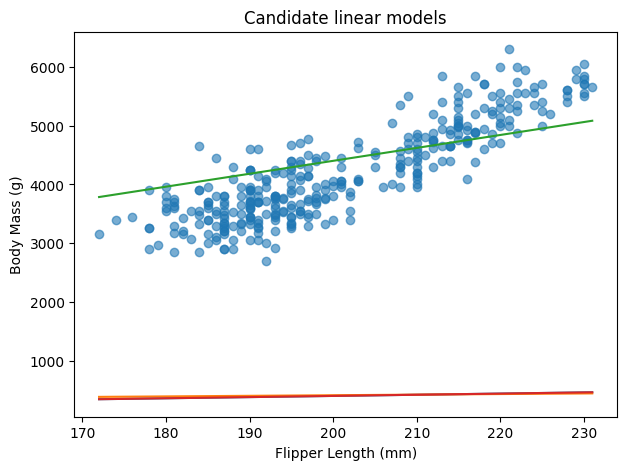

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

plt.scatter(data[feature_name], target, alpha=0.6)

for weight, intercept in zip(weights, intercepts):
    y_line = linear_model_flipper_mass(frange, weight, intercept)
    plt.plot(frange, y_line)

plt.xlabel(feature_name)
plt.ylabel(target_name)
plt.title("Candidate linear models")
plt.show()


In [14]:



def goodness_fit_measure(true_values, predictions):
    error = true_values - predictions
    squared_error = error ** 2
    return squared_error.mean()

for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data[feature_name], weight, intercept)
    err = goodness_fit_measure(target, target_predicted)

    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {err:.3f}")

   

Model #0:
2.00 (g / mm) * flipper length + 1.00 (g)
Error: 15034679.813
Model #1:
1.00 (g / mm) * flipper length + 213.00 (g)
Error: 14969582.015
Model #2:
22.00 (g / mm) * flipper length + 1.00 (g)
Error: 353790.222
Model #3:
2.00 (g / mm) * flipper length + 1.00 (g)
Error: 15034679.813
